# When AWS Lead The Cloud Market, Can Google Catch Up? 

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import re

# To Avoid unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# helper functions
def count_ma(df, normalize=False):
    if normalize == False:
        count_result = df.count()
    else:
        count_result = df.count() / df.count().sum()
    return pd.Series(count_result.values, index=df.mode().iloc[0].values)

def count_val(data, normalize=False):
    if isinstance(data, pd.Series):
        return data.value_counts(normalize=normalize).sort_values()
    elif isinstance(data, pd.DataFrame):
        return count_ma(data, normalize=normalize).sort_values()

def concat_h(ls):
    pd.concat(ls, axis=1).drop(index=['None', 'Other'])
    
plt.style.use('seaborn')
mpl.rcParams.update({'axes.spines.left': False, 
                     'axes.spines.right': False, 
                     'axes.spines.bottom': False, 
                     'axes.spines.top': False, 
                     'axes.grid': True, 
                     'axes.grid.axis' : 'both',
                     'axes.facecolor': 'white',
                     'grid.color': 'grey',
                     'grid.alpha': '0.2',
                     'axes.facecolor':'white'})
    
df_source = pd.read_csv('kaggle_survey_2021_responses.csv')
df_questions = df_source.loc[0,:]
df = df_source.loc[1:,:]

We all know google. We use a lot of their products. The Search, Maps, Android, Google Docs, Youtube, Chrome.. and about hundreds more. Some of these products that you know really well, each actually have more than 1 billion users, which is a staggering market share. Google is a household name in the tech space, which is why when Google launches a new product, all eyes will be set on Google products, as those products were met with high anticipation and expectations.

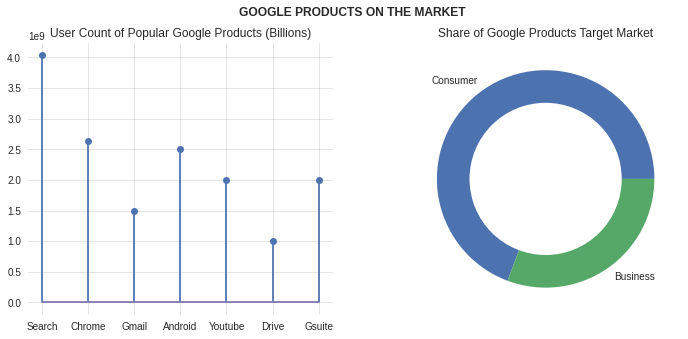

In [2]:
#google search: market share of google share * total size of internet users (92.6%* (56.727% * 7.68B internet users in 2019, the world bank))
google_usercount = pd.Series({'Search': 0.926*0.56727*7680000000,
                        'Chrome': 2640000000, 
                        'Gmail': 1500000000, 
                        'Android': 2500000000,
                        'Youtube': 2000000000,
                        'Drive': 1000000000, 
                        'Gsuite': 2000000000})

google_target = pd.Series({'Consumer': 70, 'Business': 31})

f, ax = plt.subplot_mosaic([[0,1]],figsize=(12,5))
ax[0].stem(google_usercount.index, google_usercount.values,)
ax[0].set_title('User Count of Popular Google Products (Billions)')
ax[1].pie(google_target.values, labels=google_target.index)
ax[1].add_artist(plt.Circle((0,0),0.70,fc='white'))
ax[1].set_title('Share of Google Products Target Market')
f.suptitle('GOOGLE PRODUCTS ON THE MARKET', fontweight='bold')
f.show()
#data in 2019, source not written yet.

Alphabet’s Q4 and Fiscal Year 2019 results showed the company continued to deliver strong growth, with overall revenue up 18% year-on-year. While there is a lack of transparency in revenues contributed by Google Cloud, the company reported impressive growth in excess of 100%, putting the company on an annual run rate of $10 billion as of year-end (https://kinsta.com/blog/google-cloud-vs-aws/). In 2020, the arrival of the Coronavirus pandemic saw Google Cloud’s parent company – Alphabet – record its first-ever quarterly revenue decline since going public in 2004. On the other hand, Google made significant gains thanks to Google Meet, a video conferencing tool that became a hit for remote workers.

## What About The Cloud Business?

We can see that Google wins when it comes to the consumer products. What about their business products? Let us take a look at the state of the industry. 

The products of this industry, simply put, powers the internet. People build and deploy web applications using these products. According to Amazon, the total user count of AWS in 2016 exceeds 1.000.000 (There is actually a debate about how this metric is defined, but that's another story). with total active users in the millions, not billions like some of the google products, we have to admit that users count is much lower than google consumer products. end consumers are not really familiar with it, these active users are all businesses, they are paying customers. Indeed, the industry leaders of this space are racking in a lot money.

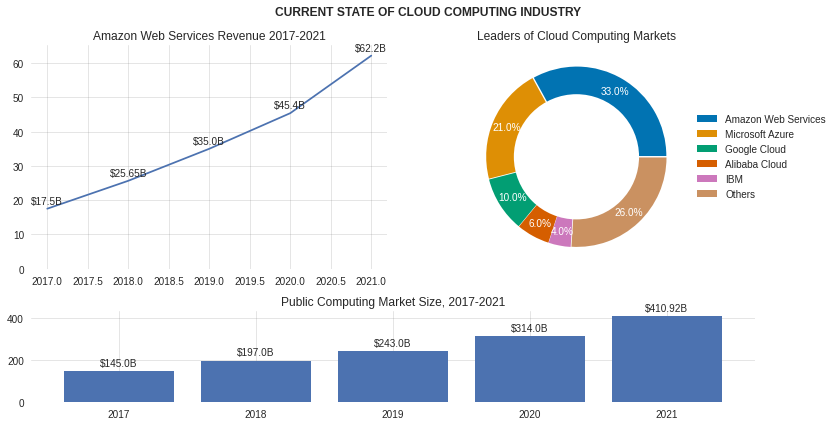

In [3]:
cloud_market_share = pd.Series({'Amazon Web Services': 33, 
                                'Microsoft Azure': 21, 
                                'Google Cloud': 10, 
                                'Alibaba Cloud':6, 
                                'IBM': 4, 
                                'Others': 26})

cloud_market = pd.DataFrame.from_dict({2021:[62.2,410.92], 
           2020: [45.4,314], 
           2019: [35.0,243], 
           2018: [25.65,197], 
           2017: [17.5,145]}, orient='index', columns=['AWS_Revenue', 'Total_Market_Size'])
#source: AWS Financial Statements.


#source = Statista
f, ax = plt.subplot_mosaic([[0,1], [0,1], [2,2]], figsize=(12,6))
#aws revenue
rect = ax[0].bar(cloud_market.index, cloud_market['AWS_Revenue'], width=0)
ax[0].bar_label(rect, labels=[f'${x}B' for x in cloud_market['AWS_Revenue']], padding=3)
ax[0].plot(cloud_market.index, cloud_market['AWS_Revenue'])
ax[0].set_title('Amazon Web Services Revenue 2017-2021')
#cloud market
patches, texts, autotexts = ax[1].pie(cloud_market_share.values, 
              labels=cloud_market_share.index, 
              autopct=lambda x: "{:1.1f}%".format(x), 
              pctdistance=0.84,
              explode = np.repeat(0.01,len(cloud_market_share)), 
              labeldistance=None, colors=sns.color_palette('colorblind',n_colors=len(cloud_market_share)))
[autotext.set_color('white') for autotext in autotexts] 
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax[1].set_title('Leaders of Cloud Computing Markets')
ax[1].add_artist(plt.Circle((0,0),0.7,fc='white'))
#total marekt size
rect = ax[2].bar(cloud_market.index, cloud_market['Total_Market_Size'])
ax[2].bar_label(rect, labels=[f'${x}B' for x in cloud_market['Total_Market_Size']], padding=3)
# ax[2].plot(cloud_market.index, cloud_market['Total_Market_Size'])
ax[2].grid(color='grey')
ax[2].set_title('Public Computing Market Size, 2017-2021')
f.tight_layout(rect=[0,0,1,0.95])
f.suptitle('CURRENT STATE OF CLOUD COMPUTING INDUSTRY', fontweight='bold')
f.show()

In this industry, Amazon leads with their Amazon Web Services (AWS) range of products. AWS posted $62.2B of annual revenue figure in 2021, which is higher than the GDP of Bulgaria. As more people use more products from the web, these figures are likely to increase.

But there is something interesting that i found this year. I went about analyzing a survey data from Kaggle, basically the website of data scientists. The survey has about 25973 respondents. Inside the survey, there is a section that discusses cloud products. I tried to plot the most often used cloud products and whether people are interested in learning them. So, when i found the results of this chart, i was surprised (do you want to tell whether yo checked the results or not?).

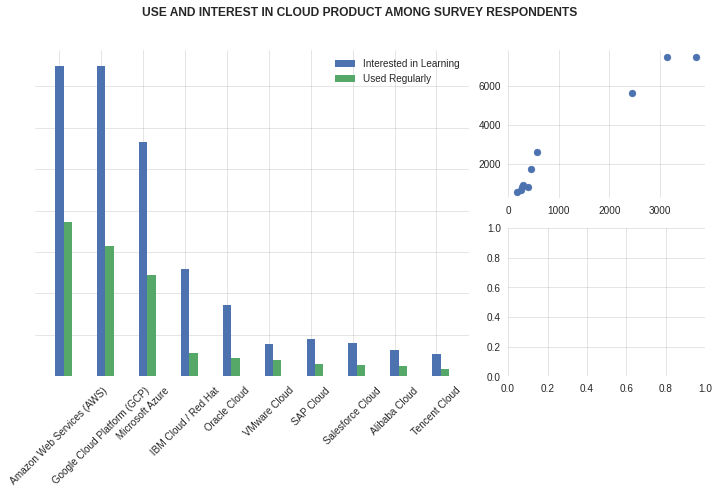

In [4]:
# cloudname_reg = re.sub(r' \(.+\) - .+ - .+', '', df_questions.Q27_A_OTHER)
cloud_reg = count_val(df.loc[:,'Q27_A_Part_1':'Q27_A_OTHER']).rename('regularly_used')
cloud_int = count_val(df.loc[:,'Q27_B_Part_1':'Q27_B_OTHER']).rename('interested')
cloud_ux = count_val(df['Q28']).rename('experience')
cloud = pd.concat([cloud_reg, cloud_int, cloud_ux], axis=1).sort_values('regularly_used', ascending=False)
#warning! this line removes some important data!
cloud = cloud.drop(index=['None', 'Other', 'None were satisfactory', 'They all had a similarly enjoyable developer experience'])

f, ax = plt.subplot_mosaic([[0,0,1],
                            [0,0,2]],figsize=(12,6))

pos = np.arange(len(cloud.index))
width = 0.2

ax[0].bar(pos-width, cloud['interested'], width=width, label = 'Interested in Learning')
ax[0].bar(pos, cloud['regularly_used'], width=width, label = 'Used Regularly')
ax[0].tick_params(left=False, labelleft=False)
ax[0].set_xticks(pos-width)
ax[0].set_xticklabels(cloud.index, rotation=45)
ax[0].legend()
ax[1].scatter(cloud['regularly_used'], cloud['interested'])
f.suptitle('USE AND INTEREST IN CLOUD PRODUCT AMONG SURVEY RESPONDENTS', fontweight='bold')
plt.show()

From this chart, it looks like people are just as interested in Google Cloud Products than AWS products, even though AWS is much more regularly used in practice. This is quite surprising, because the interest of engineers to learn AWS should be correlated to how much they are used in practice. Take a look at Microsoft Azure or IBM Cloud, for example. They are used much less in the industry, so people are less interested in learning them compared to learning AWS. 

Furthermore, we are getting a strong correlation between how regularly a product is regularly used and how interested people to learn that product.


Well, maybe it's just a single product. could be an anomaly though. Let's see on another two products. (shows another chart).

(explain hope to become more familiar = interest)

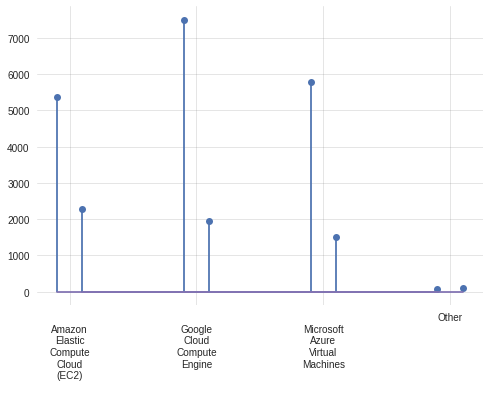

In [5]:
cloud_compute = pd.concat([count_val(df.loc[:,'Q29_A_Part_1':'Q29_A_OTHER']).rename('Regularly Used'),
                           count_val(df.loc[:,'Q29_B_Part_1':'Q29_B_OTHER']).rename('Most Interested')],
                          axis=1).drop(['None','No / None']).reset_index()
cloud_compute['index'] = cloud_compute['index'].str.replace(' ', '\n')

pos = np.arange(len(cloud_compute))
width = 0.1

f, ax = plt.subplots()
ax.stem(pos+width, cloud_compute['Most Interested'])
ax.stem(pos-width, cloud_compute['Regularly Used'])
ax.set_xticks(pos)
ax.set_xticklabels(cloud_compute['index'])

ax.invert_xaxis()

Well, this is unexpected. The same pattern that we found on the previous chart repeats. given that these... even though the latter is the current market leader and thus more often used. this is not only found in one product, but in x products. In order to understand what is happening, we will explore possible factors contributing to this phenomenon.

## The Composition of Survey Respondents
Before going into the data, it's worth to take a look at the dataset's respondents demographics. 

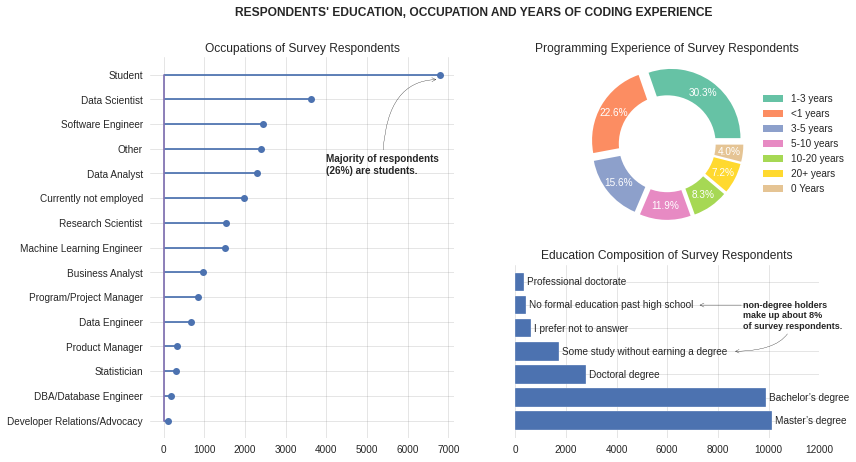

In [6]:
occupation = df['Q5'].value_counts().sort_values()

education = df['Q4'].value_counts().reset_index()
education['index'] = education['index'].replace("Some college/university study without earning a bachelor’s degree", 
                                                "Some study without earning a degree")

coding_exp = df['Q6'].value_counts().reset_index()
coding_exp['index'] = coding_exp['index'].replace({'I have never written code':'0 Years', '< 1 years': '<1 years'})
coding_exp['sorter'] = coding_exp['index'].replace({'0\nYears':0,
                                                     '<1\nyears':1,
                                                     '1-3\nyears':2,
                                                     '3-5\nyears':3,
                                                     '5-10\nyears':4,
                                                     '10-20\nyears':5,
                                                     '20+\nyears':6})

coding_exp.sort_values(by='sorter')

f, ax = plt.subplot_mosaic([[0,1],[0,2]], figsize=(12,7))
#occupation
ax[0].stem(occupation.index, occupation.values, orientation='horizontal')
ax[0].grid(axis='x', alpha=0.2, color='grey')
ax[0].annotate('Majority of respondents\n(26%) are students.', [6750,13.8], [4000, 10], arrowprops=dict(arrowstyle="->",
                        connectionstyle="angle3"), fontweight='bold')
ax[0].set_title('Occupations of Survey Respondents')
#experience
patches, texts, autotexts = ax[1].pie(coding_exp['Q6'], labels=coding_exp['index'], 
          autopct=lambda x: "{:1.1f}%".format(x), 
          pctdistance=0.80, 
          explode=np.repeat(0.1,7), 
          labeldistance=None, colors=sns.color_palette('Set2',n_colors=8))
[autotext.set_color('white') for autotext in autotexts] 
ax[1].add_artist(plt.Circle((0,0),0.70,fc='white'))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax[1].set_title('Programming Experience of Survey Respondents')
#education
rect = ax[2].barh(education['index'], education['Q4'], edgecolor='white')
ax[2].bar_label(rect, labels=education['index'], padding=3)
ax[2].set_xlim(0,12000)
ax[2].tick_params(left=False, labelleft=False)
ax[2].grid(axis='x', alpha=0.2, color='grey')
ax[2].set_title('Education Composition of Survey Respondents')
ax[2].annotate('non-degree holders\nmake up about 8%\nof survey respondents.', 
               [8600,3], [9000, 4], 
               arrowprops=dict(arrowstyle="->", connectionstyle="angle3"), fontweight='bold', size=9)
ax[2].annotate('', [7200,5],[9000, 5], 
               arrowprops=dict(arrowstyle="->", connectionstyle="angle3"))
f.suptitle("RESPONDENTS' EDUCATION, OCCUPATION AND YEARS OF CODING EXPERIENCE", fontweight='bold')
plt.show()

There are a lot of things we could discuss, but we will focus our attention first on the occupations part of the survey respondents. The largest percentage of survey respondents are students (26%). Next in line are data scientists and software engineers, while data analysts are placed in fourth. The number of student respondents are quite significant in this dataset, more than double the number of data scientists () and almost triple the number of data analysts ().

The interesting part about being a "student" is that people could assume that they come from data science-related major (Mathematics and Economics, for example). However, a student in this survey could pursue any major imaginable, because it is highly possible that people are learning data science even though they don't come from a data science related background. This situation begs the question whether these group of students actually possess enough knowledge about cloud computation. Actually, a bit of clarity about this question can be addressed by analyzing each of respondents' major. Unfortunately, Kaggle didn't include a question about it (maybe due to the highly numerous options that people can major in), thus this question remains unanswered.

Even though the largest group of respondents have 1-3 years of coding experience (30.3%), There is a significant part of respondents that are just start learning to code (22.6%) and further 4% admits that they never written a single line of code. This is yet another clue that points to the evidence that there is a significant part of survey respondents lacking experience in the field, thus maybe also lack experience about engineering in the cloud.

It is also revealed that most kaggle respondents either have or currently pursuing a Bachelor's or Master's degree. However, just like the problem presented above, we don't know whether the major they pursue comes from a technical background. In addition, 8% of survey respondents consists of people that don't have a degree.

To summarize, by analyzing the demographics we are seeing a significant part of survey respondents that are lacking experience in the field of data science. Thus, it could be questioned whether these groups of people actually have enough knowledge and experience about cloud computation. Therefore, their interest in learning a given cloud technology might have been affected by other factors besides experience and knowledge about cloud computation.

## Which One is Earlier?
As technology develops, the field of engineering will keep evolving. This is as true for data scientists, which utilize several technologies to accomplish their works. Many in the industry said that the minimum skill a data scientist should have is that they could code in R with Tidyverse libraries or Python with three libraries: NumPy, Pandas and Matplotlib and query from SQL-based databases. However, different use cases will demand the mastery of different technologies. Data scientists and machine learning specialists might need to use Scikit-Learn, TensorFlow, Keras, XGBoost library or PyTorch. Furthermore, when the data required is not available, data scientists might have to orchestrate their own pipeline using Apache Airflow. New use cases and evolving needs will push new technologies, which data scientists have to keep up with.

This is important because all these new technologies come in the last (x) years. Before that, we (). Therefore, current workflow in data science comes in the last (x) years. Who knows what new technologies will come in the next (x) years?

DS tech may come in since a long time, but cloud tech is still evolving. AWS is founded in (x) while GCP is founded in (x). so faster thing could happen in cloud technologies.

Engineers are known to be interested in the latest technology available. it could be the other way around: engineers have to keep up with the latest tech. scatter of release year vs interest.

## Could There be A Hidden Advantage?

## What Kind of Respondents Choose GCP?
intrest cart stdents vs anhi else

In [7]:
#Income bracket vs cloud provider
income_v_cloud = df.loc[:,'Q27_B_Part_1':'Q27_B_OTHER'].join(df['Q25']).groupby('Q25').count()
income_v_cloud.columns = df.loc[:,'Q27_B_Part_1':'Q27_B_OTHER'].mode().T[0].str.replace(r'^ | $', '', regex=True).values
income_v_cloud

,Amazon Web Services (AWS),Microsoft Azure,Google Cloud Platform (GCP),IBM Cloud / Red Hat,Oracle Cloud,SAP Cloud,VMware Cloud,Salesforce Cloud,Alibaba Cloud,Tencent Cloud,None,Other
Q25,,,,,,,,,,,,
$0-999,859,686,956,417,274,148,128,110,110,87,407,55
"$500,000-999,999",0,1,2,0,0,0,0,0,0,0,3,0
"1,000-1,999",191,143,212,73,44,30,21,27,21,16,56,5
"10,000-14,999",219,163,221,63,43,33,25,23,11,12,64,8
"100,000-124,999",98,74,78,17,13,9,9,16,5,3,29,6
"125,000-149,999",43,29,43,5,1,5,1,4,0,0,17,4
"15,000-19,999",135,109,129,35,22,18,9,14,14,4,42,6
"150,000-199,999",46,30,36,7,3,3,3,1,2,1,15,2
"2,000-2,999",122,89,127,38,37,27,20,18,16,9,28,6


In [8]:
df.loc[:,'Q27_B_Part_1':'Q27_B_OTHER'].mode().T[0].str.replace(r'^ | $', '', regex=True).values

array(['Amazon Web Services (AWS)', 'Microsoft Azure',
       'Google Cloud Platform (GCP)', 'IBM Cloud / Red Hat',
       'Oracle Cloud', 'SAP Cloud', 'VMware Cloud', 'Salesforce Cloud',
       'Alibaba Cloud', 'Tencent Cloud', 'None', 'Other'], dtype=object)

In [9]:
income_v_occ = df.loc[:,'Q27_B_Part_1':'Q27_B_OTHER'].join(df['Q5']).groupby('Q5').count()
income_v_occ.columns = df.loc[:,'Q27_B_Part_1':'Q27_B_OTHER'].mode().T[0].str.replace(r'^ | $', '', regex=True).values
income_v_occ

,Amazon Web Services (AWS),Microsoft Azure,Google Cloud Platform (GCP),IBM Cloud / Red Hat,Oracle Cloud,SAP Cloud,VMware Cloud,Salesforce Cloud,Alibaba Cloud,Tencent Cloud,None,Other
Q5,,,,,,,,,,,,
Business Analyst,214,190,218,64,66,58,22,53,21,18,75,16
Currently not employed,1038,763,1057,370,208,117,109,122,63,55,255,30
DBA/Database Engineer,48,39,36,6,17,8,8,7,2,1,10,0
Data Analyst,465,383,448,136,136,86,44,72,38,30,137,27
Data Engineer,103,84,87,15,8,6,7,7,12,2,20,3
Data Scientist,490,377,473,154,93,46,29,31,30,28,138,27
Developer Relations/Advocacy,22,12,18,5,6,6,1,2,4,2,6,1
Machine Learning Engineer,210,141,229,84,43,21,22,20,21,20,76,16
Other,625,480,655,224,168,120,90,113,69,41,249,23


In [10]:
cloud_comp = income_v_occ.loc[:,['Amazon Web Services (AWS)', 'Google Cloud Platform (GCP)']]
cloud_comp['difference'] = cloud_comp.iloc[:,0] - cloud_comp.iloc[:,1]
cloud_comp.sort_values('difference')

,Amazon Web Services (AWS),Google Cloud Platform (GCP),difference
Q5,,,
Research Scientist,251,297,-46
Other,625,655,-30
Currently not employed,1038,1057,-19
Machine Learning Engineer,210,229,-19
Statistician,45,57,-12
Business Analyst,214,218,-4
Product Manager,71,72,-1
Developer Relations/Advocacy,22,18,4
DBA/Database Engineer,48,36,12


Software engineers, along with data-related workers, like data scientists, data analysts and data engineers slightly are more interested Amazon Web Services (is it significant, though? and since we are comparing two things that should not be equal, does significance matter?)

On the other hand, those who don't work as a research scientist, ML Engineer, statistician, business analyst or product manager slightly are more interested in Google Cloud Platform (which of them are significant, though?, don't forget about stat power.)

The interesting thing we found is that those who currently are not employed, and those who selected "other" as their occupation both prefers Google Cloud Platform. (see of removing these guys have an effect on the graph, or whether their diff is significant in the first place) that left research scientists as the sole proponent of google cloud platforms. This begs the question as to why there are a significant amount of research scientists that prefers google cloud platforms? (thiss question stands on the assumption that their diff is significant in the first place, if not, try to look at previous year's numbers.)

since we are comparing two things that should not be equal, does significance matter? because the fact that these guys arent much different when in fact they should is interesting.

In [35]:
progexp_cloud = df.loc[:,['Q27_B_Part_1', 'Q27_B_Part_3']].join(df['Q6']).groupby('Q6').count()
progexp_cloud.columns = df.loc[:,['Q27_B_Part_1', 'Q27_B_Part_3']].mode().T[0].str.replace(r'^ | $', '', regex=True).values
progexp_cloud['difference'] = progexp_cloud.iloc[:,0] - progexp_cloud.iloc[:,1]
progexp_cloud.sort_values('difference')

,Amazon Web Services (AWS),Google Cloud Platform (GCP),difference
Q6,,,
I have never written code,368,456,-88
< 1 years,1874,1908,-34
20+ years,279,300,-21
10-20 years,355,356,-1
5-10 years,717,693,24
3-5 years,1192,1141,51
1-3 years,2709,2630,79


The results are interesting to look at. Those who have either very short experience in programming (0-1 Years) and really long (more than 20+ years) are interested in learning Google Cloud Platform. While those who have 10-20 Years in experience didn't show any difference. It is interesting to break down these highly experienced guys to take a look at their jobs. are they also research scientist/statisticians? again, this doesn't matter if the results are not significant.

In [38]:
degree_cloud = df.loc[:,['Q27_B_Part_1', 'Q27_B_Part_3']].join(df['Q4']).groupby('Q4').count()
degree_cloud.columns = df.loc[:,['Q27_B_Part_1', 'Q27_B_Part_3']].mode().T[0].str.replace(r'^ | $', '', regex=True).values
degree_cloud['difference'] = progexp_cloud.iloc[:,0] - progexp_cloud.iloc[:,1]
degree_cloud.sort_values('difference')

,Amazon Web Services (AWS),Google Cloud Platform (GCP),difference
Q4,,,
Doctoral degree,555,604,-49
Some college/university study without earning a bachelor’s degree,520,559,-39
No formal education past high school,97,122,-25
I prefer not to answer,141,150,-9
Professional doctorate,78,80,-2
Master’s degree,2639,2608,31
Bachelor’s degree,3464,3361,103


The results show that those who don't have a degree, doctorate degree holders are the ones who are most interested in learning GCP. This result is in a way similar from previous analysis, where those who either have a very small knowledge/experience or have a very high of it are the ones who are most interested in learning GCP, while those who are in the middle tend to choose AWS.

While AWS tend to saturate current state of cloud computing business, GCP is still gripping the market in consumer products. This presents a unique opportunity for GCP, because their brand strength makes those who aren't in the cloud business industry to be more familiar with google products than AWS products. to earn this new customer base (banyak ga customernya?), GCP may be able to target new comers and those who are outside of the industry by good user experience and incredible pricing (why ux & pricing important?)

## About The Dataset

### Country of Origin, Age and Gender

The dataset comes with several demographic questions, which will be visualized here. First off, we will break down the demographics of those who responded to the survey. There are however, a lot of demographic questions being asked on the survey. We will divide those questions in two parts: the first part (which we are going to take a look now) contains a more general demographic data, like age, gender and country of origin.

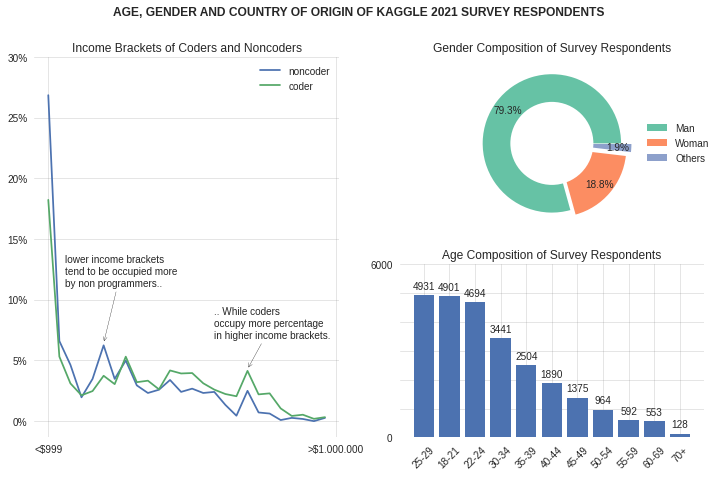

In [11]:
#prepare the data
# this code retrieves the percentage of respondents in each income bracket, each for coders and noncoders.
# the data will be saved in 'income_data' variable.
noncoder_filt = df['Q6'] == 'I have never written code'
income_data = pd.concat([df.loc[noncoder_filt, 'Q25'].value_counts(normalize=True).rename('noncoders'),
                         df.loc[~noncoder_filt, 'Q25'].value_counts(normalize=True).rename('coders')], axis=1).reset_index()
# this code transforms the income value from string to float, so we can sort it.
# we can use mapping for the replace but it's faster to do str replace twice.
income_data['sorter'] = income_data['index'].str.replace(r'.+-|>\$', '', regex=True).str.replace(',', '', regex=True).astype(np.double)
# noncoders with income more than $1,000,000 is NaN. We replace it with 0. 
income_data.fillna(0, inplace=True)
income_data.sort_values('sorter', inplace=True)
# income_data ready.

#countries
top_countries = df['Q3'].value_counts().head(10).sort_values().reset_index()
top_countries['index'] = top_countries['index'].replace({'United Kingdom of Great Britain and Northern Ireland': 'UK', 
                                                      'United States of America': 'US'})
#age
age = df['Q1'].value_counts()
#gender
gender = df['Q2'].replace({
    'Prefer not to say': 'Others',
    'Nonbinary': 'Others',
    'Prefer to self-describe': 'Others'
}).value_counts()


#render figure
f, ax = plt.subplot_mosaic([[0,2],[0,1]], figsize=(12,7))
#income
ax[0].plot(income_data['index'], income_data['noncoders'], label='noncoder')
ax[0].plot(income_data['index'], income_data['coders'], label='coder')
ax[0].set_yticks(np.linspace(0,0.35,7), labels=[f'{x}%' for x in np.arange(0,35,5)])
ax[0].set_title('Income Brackets of Coders and Noncoders')
ax[0].grid(axis='y',alpha=0.2, color='grey')
ax[0].annotate('lower income brackets\ntend to be occupied more\nby non programmers..', [5,0.075], [1.5, 0.130], arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3"))
ax[0].annotate('.. While coders\noccupy more percentage\nin higher income brackets.', [18,0.05], [15, 0.080], arrowprops=dict(arrowstyle="->",
                        connectionstyle="arc3"))
ax[0].set_xticks([income_data.loc[0,'index'], income_data.loc[0,'index'][-1]],
                ['<$999','>$1.000.000'])
ax[0].legend()
#age
rect_age = ax[1].bar(age.index, age.values)
ax[1].bar_label(rect_age, padding=4)
ax[1].set_xticks(age.index)
ax[1].set_xticklabels(age.index, rotation=45)
ytick = np.arange(0,7000,1000)
ax[1].set_yticks(ytick, labels = [0,'','','','','',6000])
ax[1].set_ylim(0,6000)
ax[1].grid(axis='y', alpha=0.2, color='grey')
ax[1].set_title('Age Composition of Survey Respondents')
#gender
colors = ['#ff9999','#66b3ff','#99ff99']
ax[2].pie(gender.values, 
          labels=gender.index, 
          colors=sns.color_palette('Set2',n_colors=3), 
          autopct=lambda x: "{:1.1f}%".format(x), 
          pctdistance=0.80,
          explode = (0.0,0.1,0.15), 
          labeldistance=None)
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax[2].set_title('Gender Composition of Survey Respondents')
ax[2].add_artist(plt.Circle((0,0),0.60,fc='white'))
#add suptitle
f.suptitle('AGE, GENDER AND COUNTRY OF ORIGIN OF KAGGLE 2021 SURVEY RESPONDENTS', fontweight='bold')
f.show()

From the data above, we can see that the largest groups of the respondents were dominated by males aged 18-29 years old. India, by a lot margin, led the way as the top country of origin of the survey respondents. After India, the US follows, and then those who answered "Other". 4 Asian countries were among the top 10: India, Japan, China and Pakistan, while Brazil represents the largest group from the South American continent, Nigeria represents the African continent, and finally Russia and United Kingdom represents the European continent.

Next, we will look at the respondents' education, occupation and years of coding experience.

 ### Education, Occupation and Years of Coding Experience
 
 For each survey answers, we will count each respondents' answers then plot it with matplotlib.

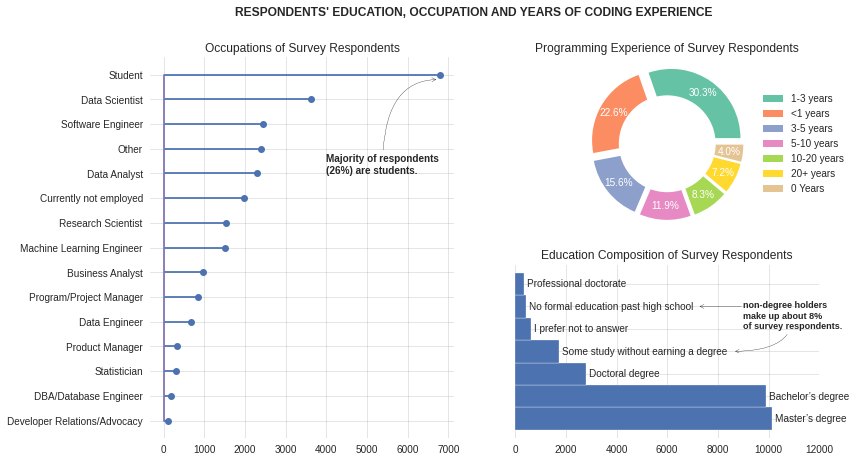

In [12]:
occupation = df['Q5'].value_counts().sort_values()

education = df['Q4'].value_counts().reset_index()
education['index'] = education['index'].replace("Some college/university study without earning a bachelor’s degree", 
                                                "Some study without earning a degree")

coding_exp = df['Q6'].value_counts().reset_index()
coding_exp['index'] = coding_exp['index'].replace({'I have never written code':'0 Years', '< 1 years': '<1 years'})
coding_exp['sorter'] = coding_exp['index'].replace({'0\nYears':0,
                                                     '<1\nyears':1,
                                                     '1-3\nyears':2,
                                                     '3-5\nyears':3,
                                                     '5-10\nyears':4,
                                                     '10-20\nyears':5,
                                                     '20+\nyears':6})

coding_exp.sort_values(by='sorter')
with mpl.rc_context({'axes.spines.left': False, 
                     'axes.spines.right': False, 
                     'axes.spines.bottom': False, 
                     'axes.spines.top': False, 
                     'axes.facecolor':'white'}):
    f, ax = plt.subplot_mosaic([[0,1],[0,2]], figsize=(12,7))
    #occupation
    ax[0].stem(occupation.index, occupation.values, orientation='horizontal')
    ax[0].grid(axis='x', alpha=0.2, color='grey')
    ax[0].annotate('Majority of respondents\n(26%) are students.', [6750,13.8], [4000, 10], arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3"), fontweight='bold')
    ax[0].set_title('Occupations of Survey Respondents')
    #experience
    patches, texts, autotexts = ax[1].pie(coding_exp['Q6'], labels=coding_exp['index'], 
              autopct=lambda x: "{:1.1f}%".format(x), 
              pctdistance=0.80, 
              explode=np.repeat(0.1,7), 
              labeldistance=None, colors=sns.color_palette('Set2',n_colors=8))
    [autotext.set_color('white') for autotext in autotexts] 
    ax[1].add_artist(plt.Circle((0,0),0.70,fc='white'))
    ax[1].legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    ax[1].set_title('Programming Experience of Survey Respondents')
    #education
    rect = ax[2].barh(education['index'], education['Q4'], height=1, edgecolor='white')
    ax[2].bar_label(rect, labels=education['index'], padding=3)
    ax[2].set_xlim(0,12000)
    ax[2].tick_params(left=False, labelleft=False)
    ax[2].grid(axis='x', alpha=0.2, color='grey')
    ax[2].set_title('Education Composition of Survey Respondents')
    ax[2].annotate('non-degree holders\nmake up about 8%\nof survey respondents.', 
                   [8600,3], [9000, 4], 
                   arrowprops=dict(arrowstyle="->", connectionstyle="angle3"), fontweight='bold', size=9)
    ax[2].annotate('', [7200,5],[9000, 5], 
                   arrowprops=dict(arrowstyle="->", connectionstyle="angle3"))
f.suptitle("RESPONDENTS' EDUCATION, OCCUPATION AND YEARS OF CODING EXPERIENCE", fontweight='bold')
plt.show()

From the visualizations that we have created, it is revealed that most kaggle respondents either have or currently pursuing a Bachelor's or Master's degree. The largest percentage of kaggle survey respondents are students, followed by Data Scientists, Software Engineers, those who answered "Other", and Data Analysts. The respondents have mostly 1-3 years of coding experience under their belt.

## About The Analyst

## Cloud Computing: What does the community use?
Let us start by finding out who the leaders are in the cloud computing industry.

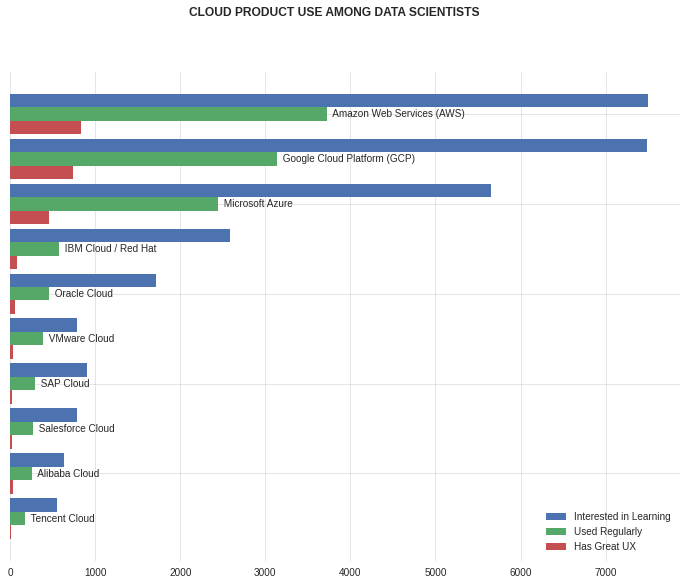

In [13]:
# cloudname_reg = re.sub(r' \(.+\) - .+ - .+', '', df_questions.Q27_A_OTHER)
cloud_reg = count_val(df.loc[:,'Q27_A_Part_1':'Q27_A_OTHER']).rename('regularly_used')
cloud_int = count_val(df.loc[:,'Q27_B_Part_1':'Q27_B_OTHER']).rename('interested')
cloud_ux = count_val(df['Q28']).rename('experience')
cloud = pd.concat([cloud_reg, cloud_int, cloud_ux], axis=1).sort_values('regularly_used', ascending=False)
#warning! this line removes some important data!
cloud = cloud.drop(index=['None', 'Other', 'None were satisfactory', 'They all had a similarly enjoyable developer experience'])

f, ax = plt.subplots(figsize=(12,9))

pos = np.arange(len(cloud.index))
height = 0.3

ax.barh(pos-height, cloud['interested'], height=height, label = 'Interested in Learning')
r_cp = ax.barh(pos, cloud['regularly_used'], height=height, label = 'Used Regularly')
ax.bar_label(r_cp, labels=cloud.index, padding=3)
ax.barh(pos+height, cloud['experience'], height=height, label = 'Has Great UX')
ax.tick_params(left=False, labelleft=False)
ax.invert_yaxis()
# ax.set_yticks(pos)
# ax.set_yticklabels(cloud.index)
ax.legend()

f.suptitle('CLOUD PRODUCT USE AMONG DATA SCIENTISTS', fontweight='bold')
plt.show()

We have created a bar plot here, plotting the counts of each service providers, with three different variables: The blue bars indicates how much respondents hoped to become more familiar with the cloud provider in question. Next, the orange bars indicates how much respondents use the cloud provider in question regularly. Finally, the green bars indicates how much respondents thought that the cloud provider in question has great UX experience.

First, let's take a look at the blue bars. Both Amazon Web Services (AWS) and Google Cloud Platform (GCP) lead ahead, with AWS emerges slightly ahead. AWS has lead the cloud computing market share for a few years from now, but GCP is catching up, and this is represented by the high count of people who are interested in being familiar with GCP. The two cloud providers are followed by Microsoft Azure in third place.

you can also see that cloud services listed by the kaggle survey has a lot of categories mixed in. For example, AWS, GCP and Microsoft Azure are Paas (Platform as a service) in nature, while Salesforce and SAP both are SaaS (software as a service). As a Data Scientist, it is understandable that they choose PaaS, as they still has control of how the data and the applications are run but do not need to manage the things like OS and runtime (). Will the survey result shift if we survey the general population instead?

In [14]:
df['Q30_B_OTHER'].value_counts()

Series([], Name: Q30_B_OTHER, dtype: int64)

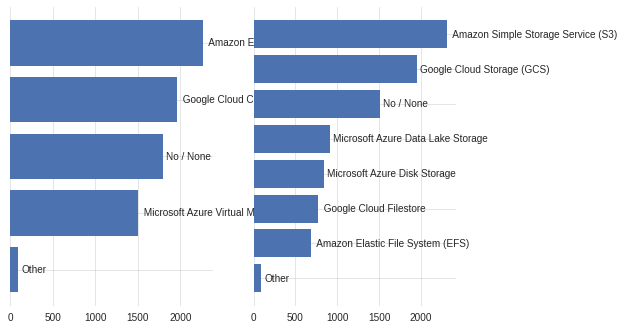

In [15]:
cloud_compute = count_val(df.loc[:,'Q29_A_Part_1':'Q29_A_OTHER'])
cloud_storage = count_val(df.loc[:,'Q30_A_Part_1':'Q30_A_OTHER'])

f, ax = plt.subplot_mosaic([[1,2]])

r_cc = ax[1].barh(cloud_compute.index, cloud_compute.values)
ax[1].bar_label(r_cc, labels=cloud_compute.index, padding=3)
ax[1].tick_params(left=False, labelleft=False)

r_cs = ax[2].barh(cloud_storage.index, cloud_storage.values)
ax[2].bar_label(r_cs, labels=cloud_storage.index, padding=3)
ax[2].tick_params(left=False, labelleft=False)
# ax[1].set_title(cloud_ux.name)

## Databases and Warehouses

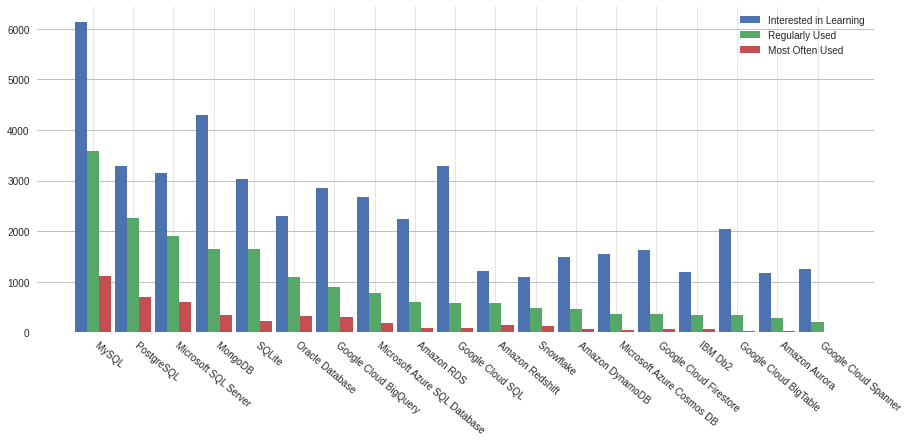

In [16]:
reg = count_val(df.loc[:,'Q32_A_Part_1':'Q32_A_OTHER']).rename(df_questions['Q32_A_OTHER'])
intsd = count_val(df.loc[:,'Q32_B_Part_1':'Q32_B_OTHER']).rename(df_questions['Q32_B_OTHER'])
oft = count_val(df.loc[:,'Q33']).rename(df_questions['Q33'])
big_data = pd.concat([reg, oft, intsd], axis=1).drop(index=['None', 'Other'])

f, ax = plt.subplots(figsize=(15,6))

pos = np.arange(len(big_data.index))
height = 0.3

ax.bar(pos+height, big_data.iloc[:,2], width=height, label = 'Interested in Learning')
ax.bar(pos, big_data.iloc[:,0], width=height, label = 'Regularly Used')
ax.bar(pos-height, big_data.iloc[:,1], width=height, label = 'Most Often Used')
ax.set_xticks(pos)
ax.set_xticklabels(big_data.index, rotation=320, ha='left')
ax.invert_xaxis()
ax.legend()
ax.grid(axis='y', alpha=0.5)
plt.show()

1. The most used products are several implementation of SQL (MySQL, PostgreSQL and Microsoft SQL Server) followed by MongoDB (a noSQL database) and SQLite.
2. Seeing which database products used regularly and the most often is not surprising: MySQL and MongoDB takes the top spot for relational database and NoSQL types, respectively. However, the level of popularity is a bit wild.
2. looks like people are interested in google products, even though these products are not used very often. All google products shown high interest. Compared to how often they are being used, people are showing relatively high interest in these products.

We will try to break this down further. because there are several products that shown relatively high interest compared to its actual use in the field, we will inspect this phenomenon in more detail. In order to do this, we will sort this product using a new metric. We will get the respondents' level of interest towards a relational database product, then divide it with how often it is regularly used (bukan dibagi ke how often, tp dibagi ke brp banyak yang bilang reguler).

why investigate people's interest in a product? the interest may be a function of popularity, which is determined partly from how often does the product actually gets used in the field. However, if that quantity of interest is a multitude larger than how it is actually used, that may be indicative of something else. For the product, this may be indicative of growth. For the users, this may show the level of 'hotness' as people may view it as a new big thing.

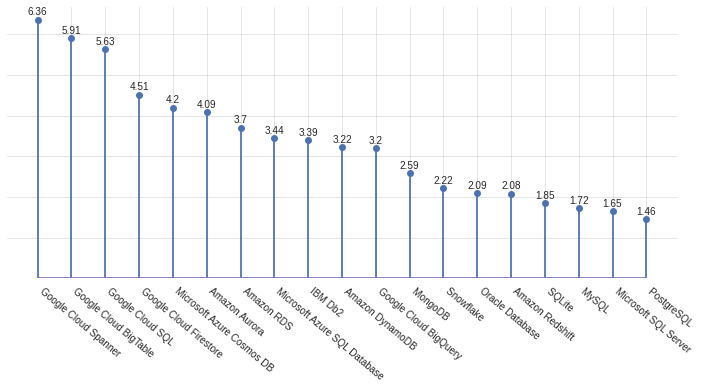

In [17]:
interest = (big_data.iloc[:,2] / big_data.iloc[:,0]).round(2).sort_values()
interest

f, ax = plt.subplots(figsize=(12,5))
r = ax.bar(interest.index, interest.values, width=0)
ax.bar_label(r, padding=3)
ax.stem(interest.index, interest.values)
ax.set_xticks(interest.index)
ax.set_xticklabels(interest.index, rotation=320, ha='left')
ax.invert_xaxis()
ax.tick_params(left=False, labelleft=False)
plt.show()

We can see that Google Cloud Spanner, a managed relational database product launched in 2020, has the highest level of interest-vs-use ratio in which people are interested 6.3 times more than how often it is actually used. In fact, three other google product has joined the top spot; namely, BigTable, Cloud SQL and Firestore. the observed high level of interest-vs-use ratio may be indicative that these products are growing and people see it as the next big thing.

(how if we plot this according to its launch date?)

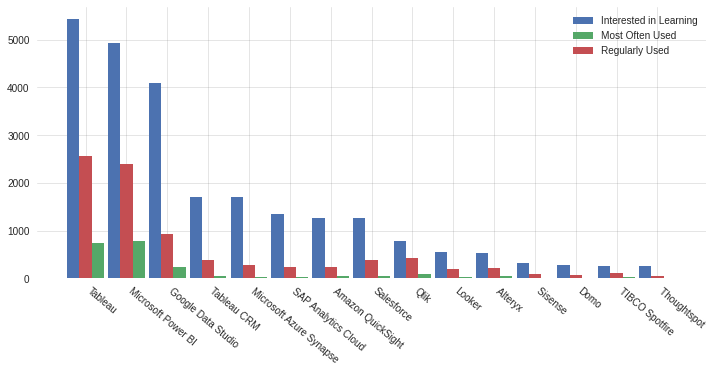

In [18]:
bi_tools_int = count_val(df.loc[:,'Q34_B_Part_1':'Q34_B_OTHER']).rename(df_questions['Q34_B_OTHER'])
bi_tools_reg = count_val(df.loc[:,'Q34_A_Part_1':'Q34_A_OTHER']).rename(df_questions['Q34_A_OTHER'])
bi_tools_oft = count_val(df.loc[:,'Q35']).rename(df_questions['Q35'])
bi_tools = pd.concat([bi_tools_int, bi_tools_reg, bi_tools_oft], axis=1).drop(index=['None', 'Other'])

pos = np.arange(len(bi_tools))
width = 0.3

f, ax = plt.subplots(figsize=(12,5))
ax.bar(pos+height, bi_tools.iloc[:,0], width=width, label = 'Interested in Learning')
ax.bar(pos-height, bi_tools.iloc[:,2], width=width, label = 'Most Often Used')
ax.bar(pos, bi_tools.iloc[:,1], width=width, label = 'Regularly Used')
ax.set_xticks(pos)
ax.set_xticklabels(bi_tools.index, rotation=320, ha='left')
ax.invert_xaxis()
ax.legend()
plt.show()

there is nothing really surprising in this data. but do we have to do the same analysis as above?

## AutoML

In [19]:
# integrate keys. 
pd.options.mode.chained_assignment = None
# replace "No / None" to just 'None'
ntarget = ['Q31_A_Part_9','Q36_A_Part_7','Q37_A_Part_7']
for n in ntarget:
    df.loc[:,n] = df.loc[:,n].str.replace('No / ', '')
# replace inconsistent values
df.loc[:,'Q36_B_Part_6'] = df.loc[:,'Q36_B_Part_6'].str.replace('Cloud ', '')
pd.options.mode.chained_assignment = 'warn'

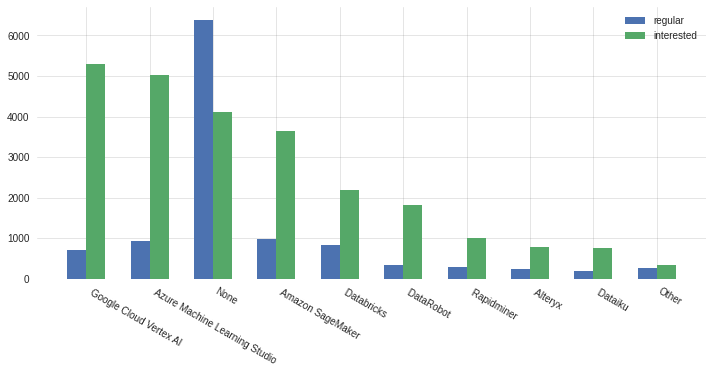

In [20]:
managed_ml = pd.concat([count_val(df.loc[:,'Q31_A_Part_1':'Q31_A_OTHER']).rename(df_questions['Q31_A_OTHER']),
                        count_val(df.loc[:,'Q31_B_Part_1':'Q31_B_OTHER']).rename(df_questions['Q31_B_OTHER'])], axis=1)

managed_ml.sort_values('In the next 2 years, do you hope to become more familiar with any of these managed machine learning products? (Select all that apply) - Selected Choice - Other', inplace=True)

pos = np.arange(len(managed_ml))
width = 0.3

f, ax = plt.subplots(figsize=(12,5))
ax.bar(pos+height/2, managed_ml.iloc[:,0], width=width, label = 'regular')
ax.bar(pos-height/2, managed_ml.iloc[:,1], width=width, label = 'interested')
ax.set_xticks(pos)
ax.set_xticklabels(managed_ml.index, rotation=330, ha='left')
ax.invert_xaxis()
ax.legend()
plt.show()

google has always top the "interest" charts. is it possible that respondents that never actually learned or experienced with this kind of tools tend to choose any google tools that are shown in the survey?

we can see that the majority of respondents don't use automl products. However, it's hard to see how much the competition fare against each other. let's plot the regularly used autoML products without the 'none' constricting our view.

In [21]:
sns.color_palette('hls',n_colors=8)

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [22]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both',
          'axes.grid.which': 'm